In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 35

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantData/Bell Pepper",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

# VIsualiztion

(32, 256, 256, 3)
[1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]


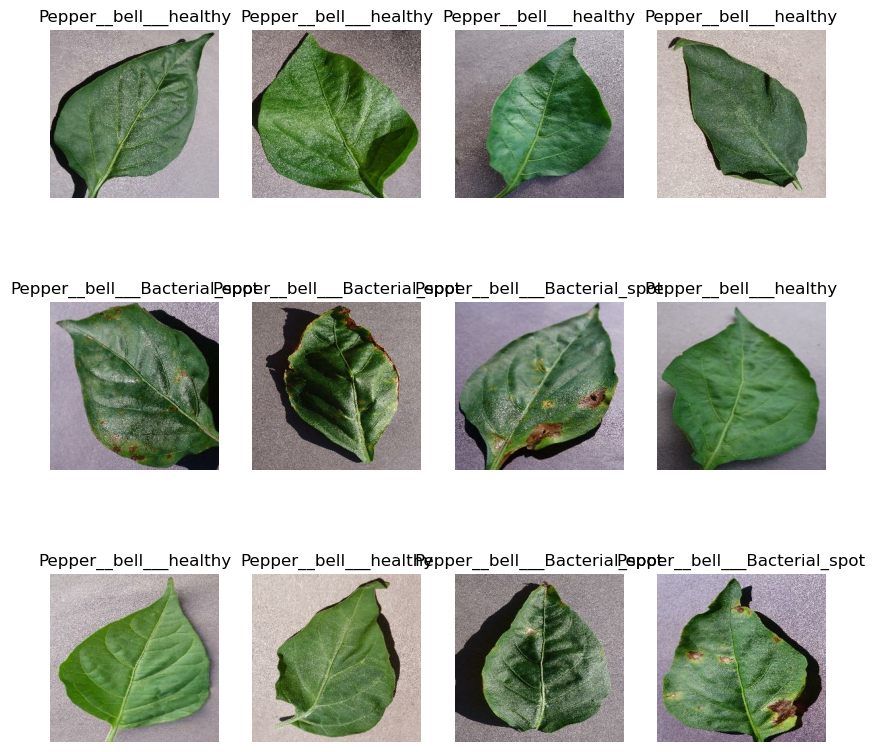

In [5]:
plt.figure(figsize = (10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.title(class_names[labels_batch[i]])

        plt.axis("off")

# training and testing

80 = training
10 = validation
10 = test

In [6]:
train_size = 0.8
len(dataset)*train_size

62.400000000000006

In [7]:
train_ds = dataset.take(54)
len(train_ds)

54

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

24

In [9]:
val_size = 0.1
len(dataset)*val_size

7.800000000000001

In [10]:
test_ds = test_ds.skip(6)
len(test_ds)

18

In [11]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [13]:
len(train_ds)

62

In [14]:
len(val_ds)

7

In [15]:
len(test_ds)

9

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.53333336 0.4862745  0.4862745 ]
  [0.6156863  0.5686275  0.5686275 ]
  [0.7647059  0.7176471  0.7176471 ]
  ...
  [0.74509805 0.70980394 0.72156864]
  [0.6862745  0.6509804  0.6627451 ]
  [0.7529412  0.7176471  0.7294118 ]]

 [[0.6431373  0.59607846 0.59607846]
  [0.6862745  0.6392157  0.6392157 ]
  [0.65882355 0.6117647  0.6117647 ]
  ...
  [0.7058824  0.67058825 0.68235296]
  [0.7647059  0.7294118  0.7411765 ]
  [0.73333335 0.69803923 0.70980394]]

 [[0.63529414 0.5882353  0.5882353 ]
  [0.67058825 0.62352943 0.62352943]
  [0.59607846 0.54901963 0.54901963]
  ...
  [0.7607843  0.7254902  0.7372549 ]
  [0.827451   0.7921569  0.8039216 ]
  [0.7372549  0.7019608  0.7137255 ]]

 ...

 [[0.7411765  0.7019608  0.73333335]
  [0.7294118  0.6901961  0.72156864]
  [0.70980394 0.67058825 0.7019608 ]
  ...
  [0.7529412  0.73333335 0.7607843 ]
  [0.8039216  0.78431374 0.8117647 ]
  [0.81960785 0.8        0.827451  ]]

 [[0.6784314  0.6392157  0.67058825]
  [0.6        0.56078434 0.5921569 ]


In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
IMAGE_SIZE

256

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/35
62/62 [==============================] - 179s 3s/step - loss: 0.6706 - accuracy: 0.6113 - val_loss: 0.4248 - val_accuracy: 0.8214
Epoch 2/35
62/62 [==============================] - 148s 2s/step - loss: 0.4062 - accuracy: 0.8263 - val_loss: 0.3240 - val_accuracy: 0.8884
Epoch 3/35
62/62 [==============================] - 136s 2s/step - loss: 0.2784 - accuracy: 0.8844 - val_loss: 0.2070 - val_accuracy: 0.9241
Epoch 4/35
62/62 [==============================] - 153s 2s/step - loss: 0.1378 - accuracy: 0.9480 - val_loss: 0.0634 - val_accuracy: 0.9821
Epoch 5/35
62/62 [==============================] - 137s 2s/step - loss: 0.0772 - accuracy: 0.9755 - val_loss: 0.0929 - val_accuracy: 0.9554
Epoch 6/35
62/62 [==============================] - 144s 2s/step - loss: 0.0378 - accuracy: 0.9903 - val_loss: 0.0156 - val_accuracy: 0.9955
Epoch 7/35
62/62 [==============================] - 139s 2s/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.0493 - val_accuracy: 0.9777
Epoch 8/35
62

In [25]:
len(test_ds)

9

In [26]:
scores = model.evaluate(test_ds)

9/9 [==============================] - 16s 593ms/step - loss: 0.0017 - accuracy: 1.0000


In [27]:
scores

[0.0016929658595472574, 1.0]

### Plotting the Accuracy and Loss Curves

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 62}

In [30]:
history.history.keys()    

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
len(history.history['loss'])

35

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
history.history['accuracy']

[0.6113092303276062,
 0.8262863159179688,
 0.884360671043396,
 0.9480386972427368,
 0.9755476117134094,
 0.9903209209442139,
 0.9867549538612366,
 0.9847172498703003,
 0.9842078685760498,
 0.9949057698249817,
 0.998471736907959,
 0.9943963289260864,
 0.9954151511192322,
 0.9949057698249817,
 0.9928680658340454,
 0.998471736907959,
 0.9974528551101685,
 0.9928680658340454,
 0.9979622960090637,
 0.9989811778068542,
 0.9943963289260864,
 0.9979622960090637,
 0.9964340329170227,
 0.9933775067329407,
 0.9979622960090637,
 0.998471736907959,
 0.9974528551101685,
 0.9979622960090637,
 0.998471736907959,
 0.996943473815918,
 0.998471736907959,
 0.9979622960090637,
 0.9989811778068542,
 0.9949057698249817,
 0.9994905591011047]

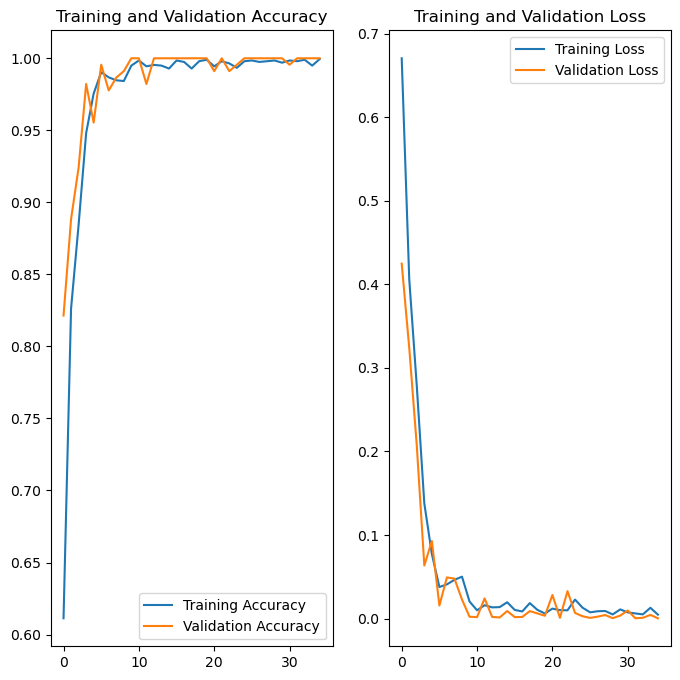

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Prediction on image

first image to predict
actual label: Pepper__bell___healthy
predicted label: Pepper__bell___healthy


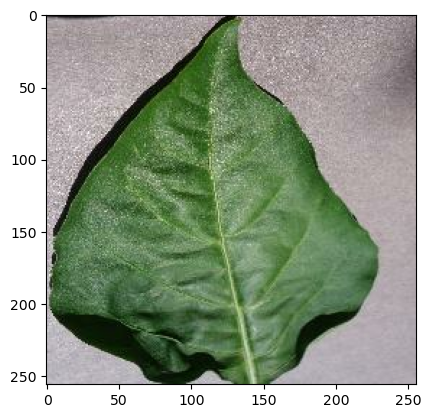

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Function for interference

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


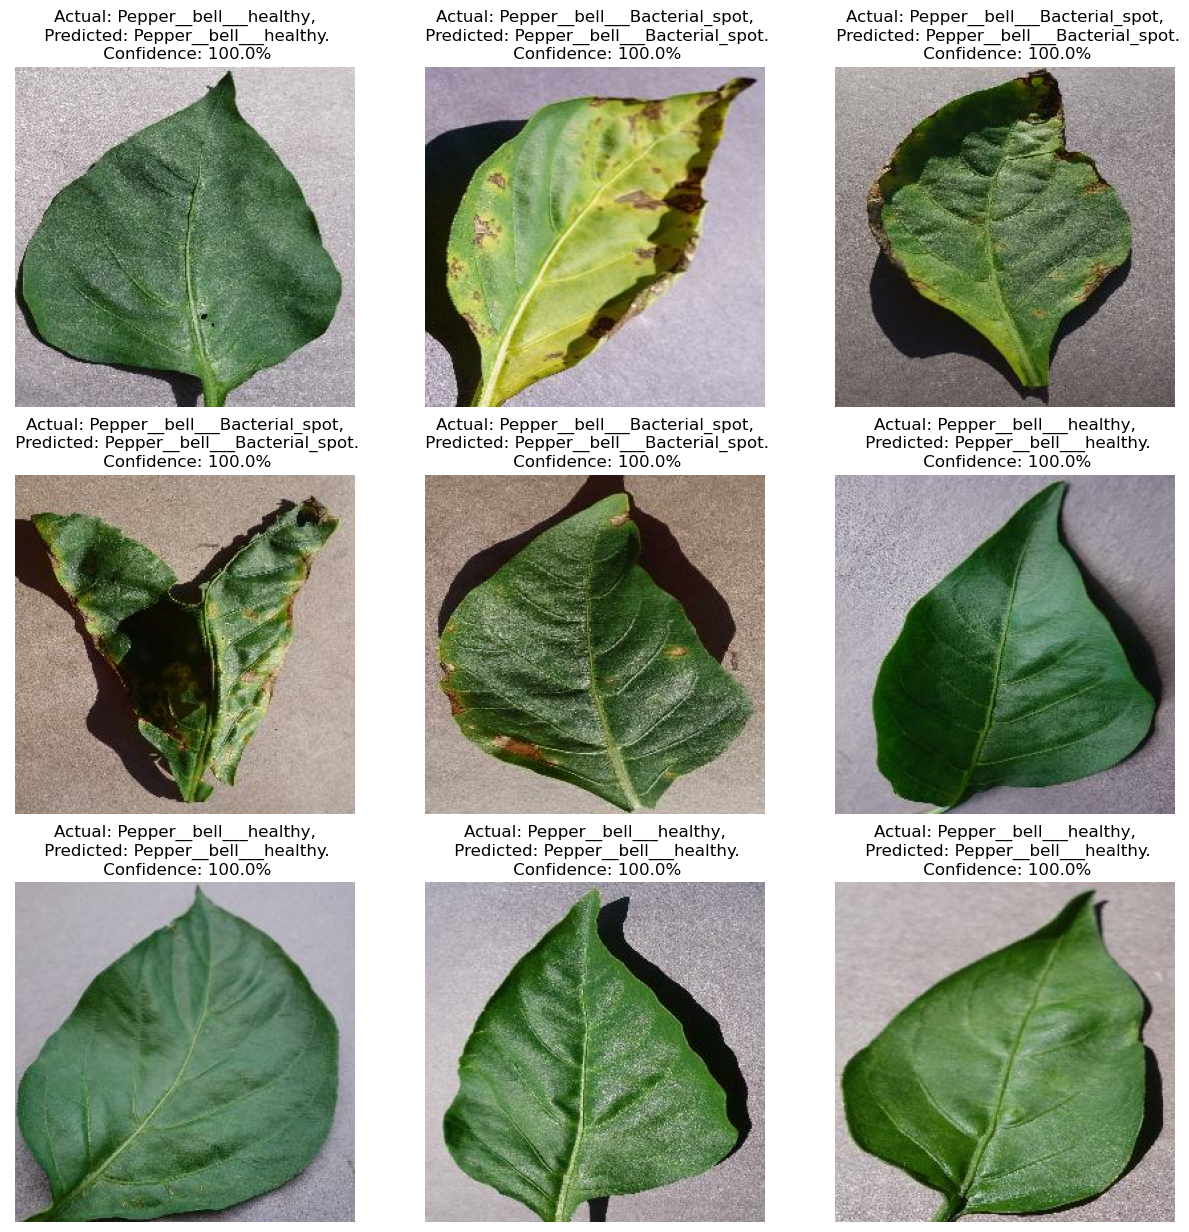

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


### Saving the Model
We append the model to the list of models as a new version

In [41]:
import os
model_version = max([int(i) for i in os.listdir("C:/Potato Project/training/models/bell_peper_models") + [0]])+1
model.save(f"C:/Potato Project/training/models/bell_peper_models/{model_version}")


INFO:tensorflow:Assets written to: C:/Potato Project/training/models/bell_peper_models/1\assets


In [42]:
model.save("../bellPeper.h5")
